### Choosing the Right Metric


<center>
    <img src = 'images/uci_biz.png'/>
</center>


This module introduced both the K Nearest Neighbors model as well as a variety of different metrics for classification.  It is important to select and understand the appropriate metric for your task.  This exercise is meant to get practice considering the difference between these new classification metrics and accompanying evaluation tools. Specifically, explore datasets related to business from the UCI Machine Learning Repository [here](https://archive-beta.ics.uci.edu/ml/datasets?f%5Barea%5D%5B0%5D=business&p%5Boffset%5D=0&p%5Blimit%5D=10&p%5BorderBy%5D=NumHits&p%5Border%5D=desc&p%5BStatus%5D=APPROVED).  

Select a dataset of interest and clearly state the classification task.  Specifically, describe a business problem that could be solved using the dataset and a KNN classification model.  Further, identify what you believe to be the appropriate metric and justify your choice.  Build a basic model with the `KNearestNeighbor` and grid search to optimize towards your chosen metric.  Share your results with your peers.

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import set_config
set_config("figure")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import load_breast_cancer
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.metrics import plot_confusion_matrix

warnings.simplefilter(action='ignore', category=FutureWarning)
set_config("display")
from sklearn.metrics import accuracy_score, recall_score, precision_score, precision_recall_curve, roc_curve

In [88]:
missing = pd.read_csv('abs.csv', sep=';')

In [89]:
missing.head()
missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

In [90]:
missing.rename(inplace = True, columns = {"Absenteeism time in hours": 'hours_missed', 'Transportation expense': 'commute_exp', 
                         'Distance from Residence to Work': 'distance', 'Body mass index': 'bmi', 
                                          'Work load Average/day':'work_load'})
missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      740 non-null    int64  
 1   Reason for absence      740 non-null    int64  
 2   Month of absence        740 non-null    int64  
 3   Day of the week         740 non-null    int64  
 4   Seasons                 740 non-null    int64  
 5   commute_exp             740 non-null    int64  
 6   distance                740 non-null    int64  
 7   Service time            740 non-null    int64  
 8   Age                     740 non-null    int64  
 9   Work load Average/day   740 non-null    float64
 10  Hit target              740 non-null    int64  
 11  Disciplinary failure    740 non-null    int64  
 12  Education               740 non-null    int64  
 13  Son                     740 non-null    int64  
 14  Social drinker          740 non-null    in

In [91]:
missing.corr()
missing.describe()
# missing['hours_missed'].median()
missing['hours_missed'].value_counts()

8      208
2      157
3      112
1       88
4       60
0       44
16      19
24      16
5        7
40       7
32       6
64       3
80       3
120      3
56       2
112      2
7        1
104      1
48       1
Name: hours_missed, dtype: int64

In [92]:
missing['risk'] = np.where(missing['hours_missed'] >= 8, 1, 0)
missing.info()
missing.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      740 non-null    int64  
 1   Reason for absence      740 non-null    int64  
 2   Month of absence        740 non-null    int64  
 3   Day of the week         740 non-null    int64  
 4   Seasons                 740 non-null    int64  
 5   commute_exp             740 non-null    int64  
 6   distance                740 non-null    int64  
 7   Service time            740 non-null    int64  
 8   Age                     740 non-null    int64  
 9   Work load Average/day   740 non-null    float64
 10  Hit target              740 non-null    int64  
 11  Disciplinary failure    740 non-null    int64  
 12  Education               740 non-null    int64  
 13  Son                     740 non-null    int64  
 14  Social drinker          740 non-null    in

,ID,Reason for absence,Month of absence,Day of the week,Seasons,commute_exp,distance,Service time,Age,Work load Average/day,...,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,bmi,hours_missed,risk
0,11,26,7,3,1,289,36,13,33,239.554,...,1,2,1,0,1,90,172,30,4,0
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,0,0,98,178,31,0,0
2,3,23,7,4,1,179,51,18,38,239.554,...,1,0,1,0,0,89,170,31,2,0
3,7,7,7,5,1,279,5,14,39,239.554,...,1,2,1,1,0,68,168,24,4,0
4,11,23,7,5,1,289,36,13,33,239.554,...,1,2,1,0,1,90,172,30,2,0


In [93]:
missing['risk'].value_counts()

0    469
1    271
Name: risk, dtype: int64

In [94]:
X = missing[['commute_exp', 'distance', 'Age', 'Pet', 'bmi' ]]
y = missing['risk']

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [96]:
pipe = Pipeline([
                ('scale', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors = 5))
])
pipe.fit(X_train, y_train)
pipe_acc = pipe.score(X_test, y_test)
pipe_acc2 = pipe.score(X_train, y_train)
print(pipe_acc)
print(pipe_acc2)

0.6810810810810811
0.7063063063063063


In [97]:
params = {'knn__n_neighbors': list(range(1,len(y_test)))}
knn_grid = GridSearchCV(
                    estimator = pipe,
                    param_grid = params,
                    cv = 5,
                    scoring = 'accuracy')
knn_grid.fit(X_train, y_train)
best_k = list(knn_grid.best_params_.values())[0]
best_acc = knn_grid.score(X_test, y_test)
best_acc2 = knn_grid.score(X_train, y_train)
print(best_acc)
print(best_acc2)
print(best_k)

0.6594594594594595
0.7261261261261261
11


In [98]:
base_acc = pipe.score(X_test, y_test)
prediction_actual = pd.DataFrame({'prediction': pipe.predict(X_test), 'actual': y_test})
# diffs = prediction_actual.loc[prediction_actual['prediction'] != prediction_actual['actual']]
diffs = prediction_actual.loc[(prediction_actual['prediction'] == 0) & (prediction_actual['actual']== 1)]
diffs2 = prediction_actual.loc[(prediction_actual['prediction'] == 1) & (prediction_actual['actual']== 0)]
total_diffs = prediction_actual.loc[prediction_actual['prediction'] != prediction_actual['actual']]
# fn = diffs.loc[diffs['prediction'] == '0']
print(prediction_actual)
print(diffs.shape)
print(diffs2.shape)
print(total_diffs.shape)

     prediction  actual
120           0       0
416           0       0
334           1       1
350           0       0
412           0       0
..          ...     ...
465           0       1
24            1       1
196           0       1
210           0       0
294           0       0

[185 rows x 2 columns]
(33, 2)
(26, 2)
(59, 2)


185 total predictions.  59 incorrect predictions.  33 where predicted they were not a risk but were actually a risk. 26 predicted they were a risk but they actually were not a risk.

In [99]:
base_probs = pipe.predict_proba(X_test)
# base_probs
bp_df = pd.DataFrame(base_probs, columns = ['p_no', 'p_yes'])
print(bp_df)


     p_no  p_yes
0     0.6    0.4
1     1.0    0.0
2     0.4    0.6
3     0.6    0.4
4     0.8    0.2
..    ...    ...
180   0.8    0.2
181   0.0    1.0
182   1.0    0.0
183   0.6    0.4
184   1.0    0.0

[185 rows x 2 columns]


In [100]:
strict_preds = np.where(base_probs[:, 0] > .7, 0, 1)
bp_df['strict_preds'] = strict_preds.tolist()
bp_df['actual'] =  y_test.tolist()
bp_df

fp = bp_df.loc[(bp_df['strict_preds']== 0) & (bp_df['actual'] == 1)]
fp.shape

(20, 4)

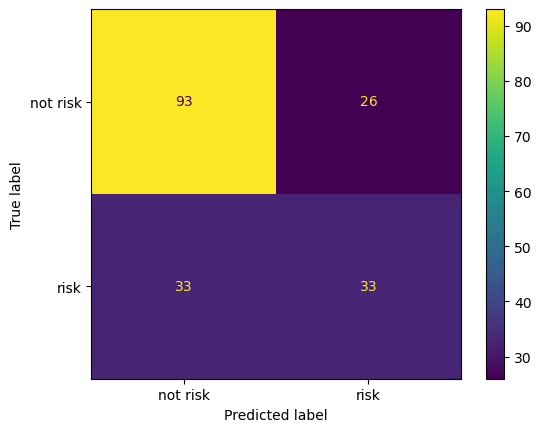

In [101]:
# pipe prediction with 5 neighbors 
missing_confusion_mat = ConfusionMatrixDisplay.from_predictions(y_test, pipe.predict(X_test), display_labels = ['not risk', 'risk'] )

In [106]:
min_fp = precision_score(y_test, pipe.predict(X_test), pos_label = 1)
min_fp1 = recall_score(y_test, pipe.predict(X_test), pos_label = 1)
min_fp2 = accuracy_score(y_test, pipe.predict(X_test))
print(min_fp)
print(min_fp1)
print(min_fp2)

0.559322033898305
0.5
0.6810810810810811


Recall: Of the 66 risky workers, identified 50%(33) of them.
Precision: Of the 59 workers predicted to be risky, 56%(33) of them correctly identified.
Accuracy: Of the 185 total workers, 68%(126) of them were correctly identified.
Of the 119 not risky workers, 78%(93) of them were correctly identified.
Of the 126 predicted to be non risky, 74%(93) were correctly identified.

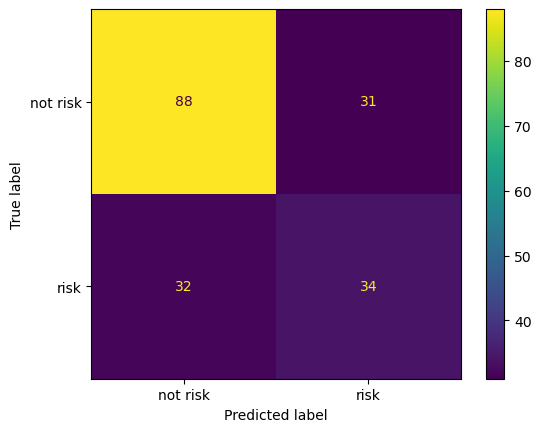

In [107]:
# pipe prediction with Search
missing_confusion_mat2 = ConfusionMatrixDisplay.from_predictions(y_test, knn_grid.predict(X_test), display_labels = ['not risk', 'risk'] )

In [129]:
min_fp = precision_score(y_test, knn_grid.predict(X_test), pos_label = 1)
min_fp1 = recall_score(y_test, knn_grid.predict(X_test), pos_label = 1)
min_fp2 = accuracy_score(y_test, knn_grid.predict(X_test))
print(min_fp)
print(min_fp1)
print(min_fp2)

0.5230769230769231
0.5151515151515151
0.6594594594594595


Recall: Of the 66 risky workers, identified 52%(34) of them.
Precision: Of the 65 workers predicted to be risky, 52%(34) of them correctly identified.
Accuracy: Of the 185 total workers, 66%(122) of them were correctly identified.
Of the 119 not risky workers, 74%(88) of them were correctly identified.
Of the 120 predicted to be non risky, 73%(88) were correctly identified.

In [145]:
strict_preds = np.where(base_probs[:, 0] > .7, 0, 1)
loose_preds = np.where(base_probs[:, 0] > .3, 0, 1)
mid_preds = base_probs

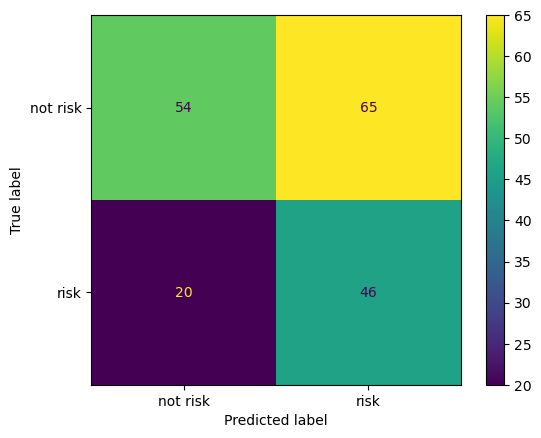

In [146]:
strict = ConfusionMatrixDisplay.from_predictions(y_test, strict_preds, display_labels = ['not risk', 'risk'] )

In [122]:
min_fp = precision_score(y_test, strict_preds, pos_label = 1)
min_fp1 = recall_score(y_test, strict_preds, pos_label = 1)
min_fp2 = accuracy_score(y_test, strict_preds)
print(min_fp)
print(min_fp1)
print(min_fp2)

0.4144144144144144
0.696969696969697
0.5405405405405406


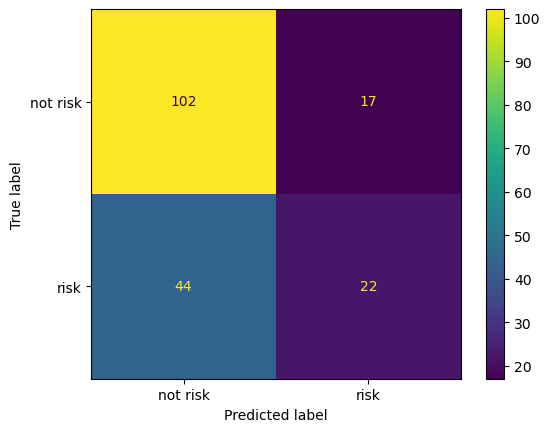

In [123]:
loose = missing_confusion_mat2 = ConfusionMatrixDisplay.from_predictions(y_test, loose_preds, display_labels = ['not risk', 'risk'] )

In [128]:
min_fp = precision_score(y_test, loose_preds, pos_label = 1)
min_fp1 = recall_score(y_test, loose_preds, pos_label = 1)
min_fp2 = accuracy_score(y_test, loose_preds)
print(min_fp)
print(min_fp1)
print(min_fp2)

0.5641025641025641
0.3333333333333333
0.6702702702702703


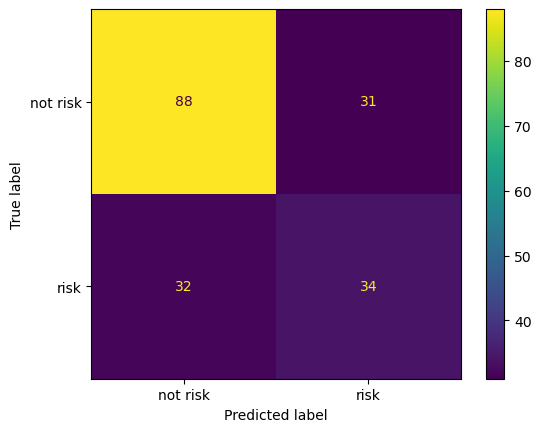

In [125]:
norm = missing_confusion_mat2 = ConfusionMatrixDisplay.from_predictions(y_test, knn_grid.predict(X_test), display_labels = ['not risk', 'risk'] )

In [130]:
min_fp = precision_score(y_test, knn_grid.predict(X_test), pos_label = 1)
min_fp1 = recall_score(y_test, knn_grid.predict(X_test), pos_label = 1)
min_fp2 = accuracy_score(y_test, knn_grid.predict(X_test))
print(min_fp)
print(min_fp1)
print(min_fp2)

0.5230769230769231
0.5151515151515151
0.6594594594594595


In [151]:
test_predictions = knn_grid.predict_proba(X_test)

In [140]:
def precision_thresh(predict_probs, 
                  y_test, 
                  thresh):
    preds = np.where(predict_probs >= thresh, 0, 1)
    
    return precision_score(y_test, preds, pos_label= 0)

In [142]:
print(precision_thresh(test_predictions[:, 1], y_test, 0.1))
print(precision_thresh(test_predictions[:, 1], y_test, 0.9))

0.6384180790960452
0.29411764705882354


In [147]:
thresholds = np.arange(0, 1, .1)
thresholds

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [149]:
results_df = pd.DataFrame({'threshold': thresholds, 'precision': [precision_thresh(test_predictions[:, 1], y_test, i) for i in thresholds]})
results_df

,threshold,precision
0,0.0,0.643243
1,0.1,0.638418
2,0.2,0.607143
3,0.3,0.465909
4,0.4,0.435897
5,0.5,0.476923
6,0.6,0.358974
7,0.7,0.437500
8,0.8,0.294118
9,0.9,0.294118


In [161]:
def recall_thresh(predict_probs, 
                  y_test, 
                  thresh):
    preds = np.where(predict_probs >= thresh, 0, 1)
    
    return recall_score(y_test, preds, pos_label= 1)

In [162]:
print(recall_thresh(test_predictions[:, 1], y_test, 0.3))
print(recall_thresh(test_predictions[:, 1], y_test, 0.7))

0.2878787878787879
0.7272727272727273


In [155]:
results_df = pd.DataFrame({'threshold': thresholds, 'recall': [recall_thresh(test_predictions[:, 1], y_test, i) for i in thresholds]})
results_df

,threshold,recall
0,0.0,0.000000
1,0.1,0.030303
2,0.2,0.166667
3,0.3,0.287879
4,0.4,0.333333
5,0.5,0.484848
6,0.6,0.621212
7,0.7,0.727273
8,0.8,0.818182
9,0.9,0.818182


In [165]:
precision, recall, boundaries = precision_recall_curve(y_test, test_predictions[:, 1], pos_label=1)

[0.09090909 0.18181818 0.27272727 0.36363636 0.45454545]


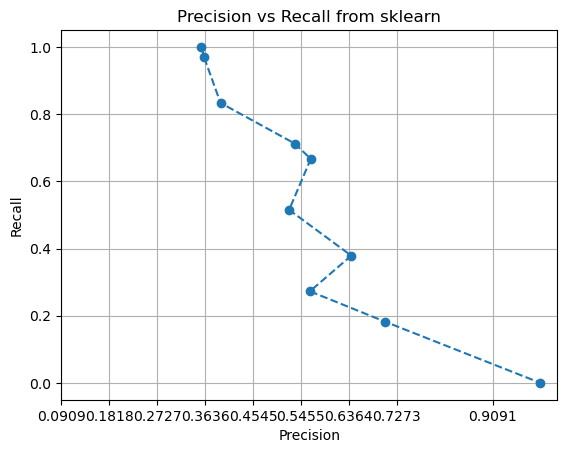

In [167]:
print(boundaries[:5])
plt.plot(precision, recall, '--o')
plt.xticks(boundaries);
plt.grid()
plt.ylabel('Recall')
plt.xlabel('Precision')
plt.title('Precision vs Recall from sklearn');

In [168]:
fpr, tpr, thresh_rocs = roc_curve(y_test, test_predictions[:, 1], pos_label= 1)

False Positive Rates:  [0.         0.04201681 0.11764706 0.11764706 0.2605042 ]
True Positive Rates:  [0.         0.18181818 0.27272727 0.37878788 0.51515152]


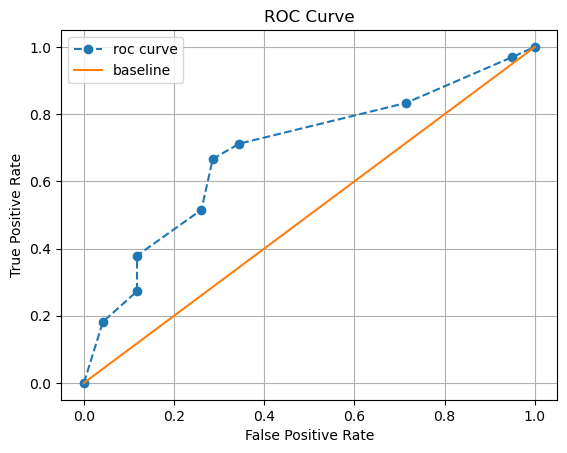

In [170]:
print('False Positive Rates: ', fpr[:5])
print('True Positive Rates: ', tpr[:5])
plt.plot(fpr, tpr, '--o', label = 'roc curve')
plt.plot(tpr, tpr, label = 'baseline')
plt.legend()
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid();

In [172]:
roc_grid = GridSearchCV(pipe, param_grid={'knn__n_neighbors': range(1, 33, 2)}, scoring = 'roc_auc')
roc_grid.fit(X_train, y_train)
best_k = roc_grid.best_params_['knn__n_neighbors']
best_k

19

In [173]:
from sklearn.metrics import RocCurveDisplay

In [175]:
knn_1 = Pipeline([('transform', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors = 1))])
knn_1.fit(X_train, y_train)

Pipeline(steps=[('transform', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=1))])

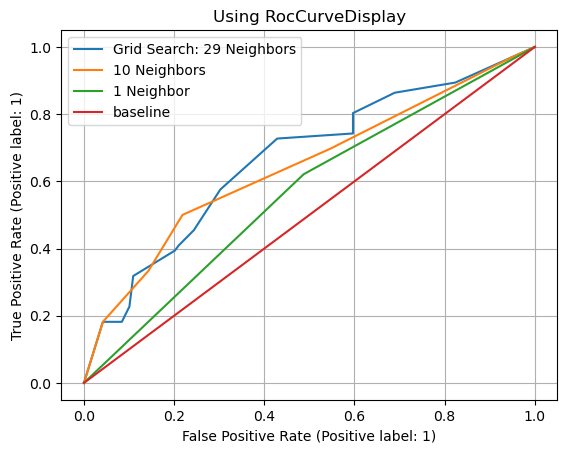

In [178]:
fig, ax = plt.subplots()
RocCurveDisplay.from_estimator(roc_grid, X_test, y_test, pos_label = 1, ax = ax, label = 'Grid Search: 29 Neighbors')
RocCurveDisplay.from_estimator(pipe, X_test, y_test, pos_label = 1, ax = ax, label = '10 Neighbors')
RocCurveDisplay.from_estimator(knn_1, X_test, y_test, ax = ax, label = '1 Neighbor')
plt.grid()
plt.plot(np.arange(0, 1.1, .1), np.arange(0, 1.1, .1), label = 'baseline');
plt.title('Using RocCurveDisplay')
plt.legend();